### Dataset

### Context
This data set is from [Kaggle](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database). It contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.

### Content
#### anime.csv

- `anime_id` - myanimelist.net's unique id identifying an anime.
- `name` - full name of anime.
- `genre` - comma separated list of genres for this anime.
- `type` - movie, TV, OVA, etc.
- `episodes` - how many episodes in this show. (1 if movie).
- `rating` - average rating out of 10 for this anime.
- `members` - number of community members that are in this anime's "group".

#### rating.csv
- `user_id` - non identifiable randomly generated user id.
- `anime_id` - the anime that this user has rated.
- `rating` - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

In [ ]:
## import csv
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#reading csv files
anime_data=pd.read_csv('./csv/anime_cleaned.csv')
rating_data=pd.read_csv('./csv/rating.csv')

In [ ]:
# get anime_id by anime_name
def get_anime_id(anime_name):
    anime_id=anime_data[anime_data['name']==anime_name]['anime_id'].values[0]
    return anime_id
get_anime_id('Kimi no Na wa.')

32281

: 

## Data Exploration

In [ ]:
## print shape of dataset with rows and columns and information - anime_data
print ("The shape of the  data is (row, column):"+ str(anime_data.shape))
print (anime_data.info())

The shape of the  data is (row, column):(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [110]:
## print shape of dataset with rows and columns and information- user rating
print ("The shape of the  data is (row, column):"+ str(rating_data.shape))
print (rating_data.info())

The shape of the  data is (row, column):(7813737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [111]:
# Merge the two datasets
anime_fulldata=pd.merge(anime_data,rating_data,on='anime_id',suffixes= ['', '_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


Text(0, 0.5, 'Rating count')

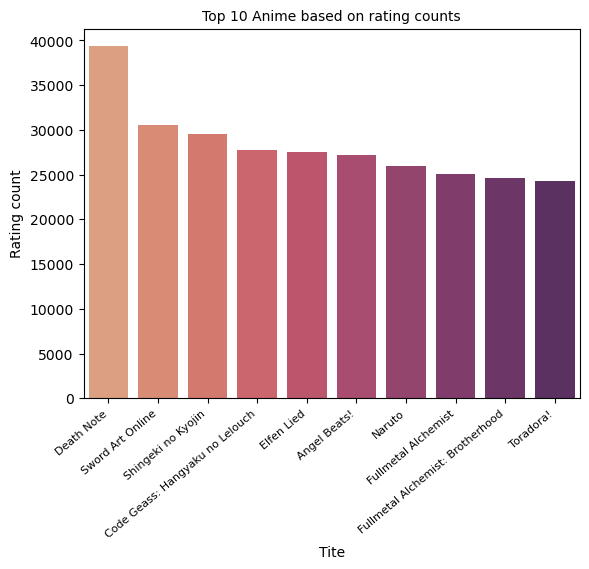

In [32]:
# Creating a dataframe for rating counts
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )

# Plotting the bar plot for top 10 anime as per rating 
top10_by_rating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_by_rating, palette="flare")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 10)
ax.set_xlabel('Tite',fontsize = 10) 
ax.set_ylabel('Rating count', fontsize = 10)

Text(0, 0.5, 'Community Size (million)')

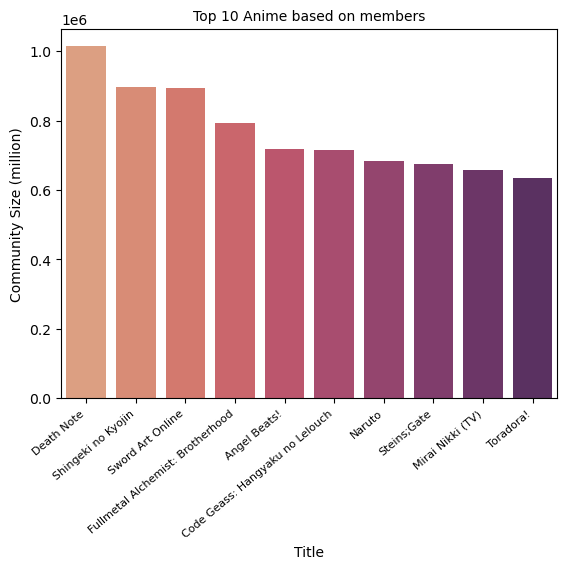

In [33]:

#Creating a copy and dropping the duplicates
duplicate_anime=anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset ="anime_title", 
                     keep = 'first', inplace = True)
#Plotting bar plot               
top10_by_members=duplicate_anime[['anime_title', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="members", data=top10_by_members, palette="flare")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 10)
ax.set_xlabel('Title',fontsize = 10) 
ax.set_ylabel('Community Size (million)', fontsize = 10)

Text(0.5, 1.0, 'Rating of users')

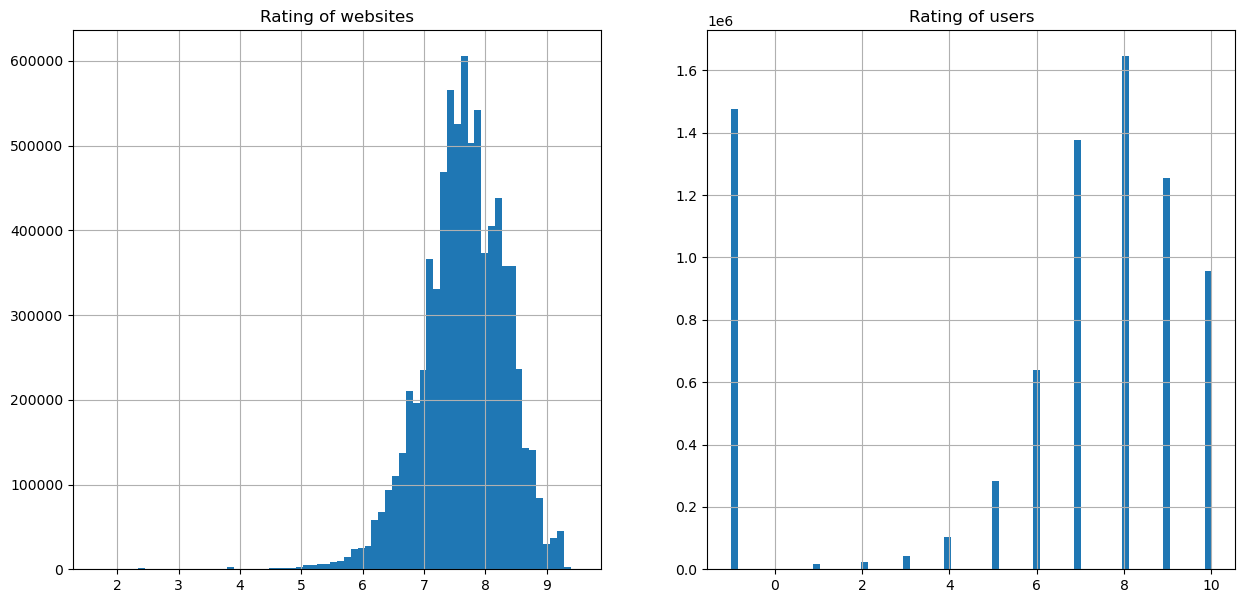

In [34]:
#Distribution of ratings
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
anime_fulldata['rating'].hist(bins=70)
plt.title("Rating of websites")
plt.subplot(1,2,2)
anime_fulldata['user_rating'].hist(bins=70)
plt.title("Rating of users")

## Data Preparation

In [112]:
#Replacing -1 with NaN in user_rating column
anime_feature=anime_fulldata.copy()
anime_feature["user_rating"].replace({-1: np.nan}, inplace=True)
anime_feature.head()

#dropping all the null values as it aids nothing
anime_feature = anime_feature.dropna(axis = 0, how ='any') 
anime_feature.isnull().sum()

anime_id       0
anime_title    0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
user_rating    0
dtype: int64

In [36]:
anime_feature['user_id'].value_counts()

42635    3747
53698    2905
57620    2689
59643    2632
51693    2620
         ... 
41324       1
11199       1
19041       1
26082       1
62930       1
Name: user_id, Length: 69600, dtype: int64

In [113]:
counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 200].index)]
anime_feature['anime_title']

2                                             Kimi no Na wa.
3                                             Kimi no Na wa.
7                                             Kimi no Na wa.
11                                            Kimi no Na wa.
14                                            Kimi no Na wa.
                                 ...                        
7813713         Toushindai My Lover: Minami tai Mecha-Minami
7813716                                          Under World
7813717                                          Under World
7813720                       Violence Gekiga David no Hoshi
7813724    Violence Gekiga Shin David no Hoshi: Inma Dens...
Name: anime_title, Length: 3179693, dtype: object

In [114]:
anime_pivot=anime_feature.pivot_table(index='anime_title',columns='user_id',values='user_rating').fillna(0)
anime_pivot.head()

user_id,5,7,17,38,43,46,123,129,139,160,...,73406,73417,73422,73457,73460,73476,73499,73502,73503,73507
anime_title,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
anime_pivot_df = pd.DataFrame(anime_pivot)
anime_pivot_df.head()

user_id,5,7,17,38,43,46,123,129,139,160,...,73406,73417,73422,73457,73460,73476,73499,73502,73503,73507
anime_title,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='user_id', ylabel='anime_title'>

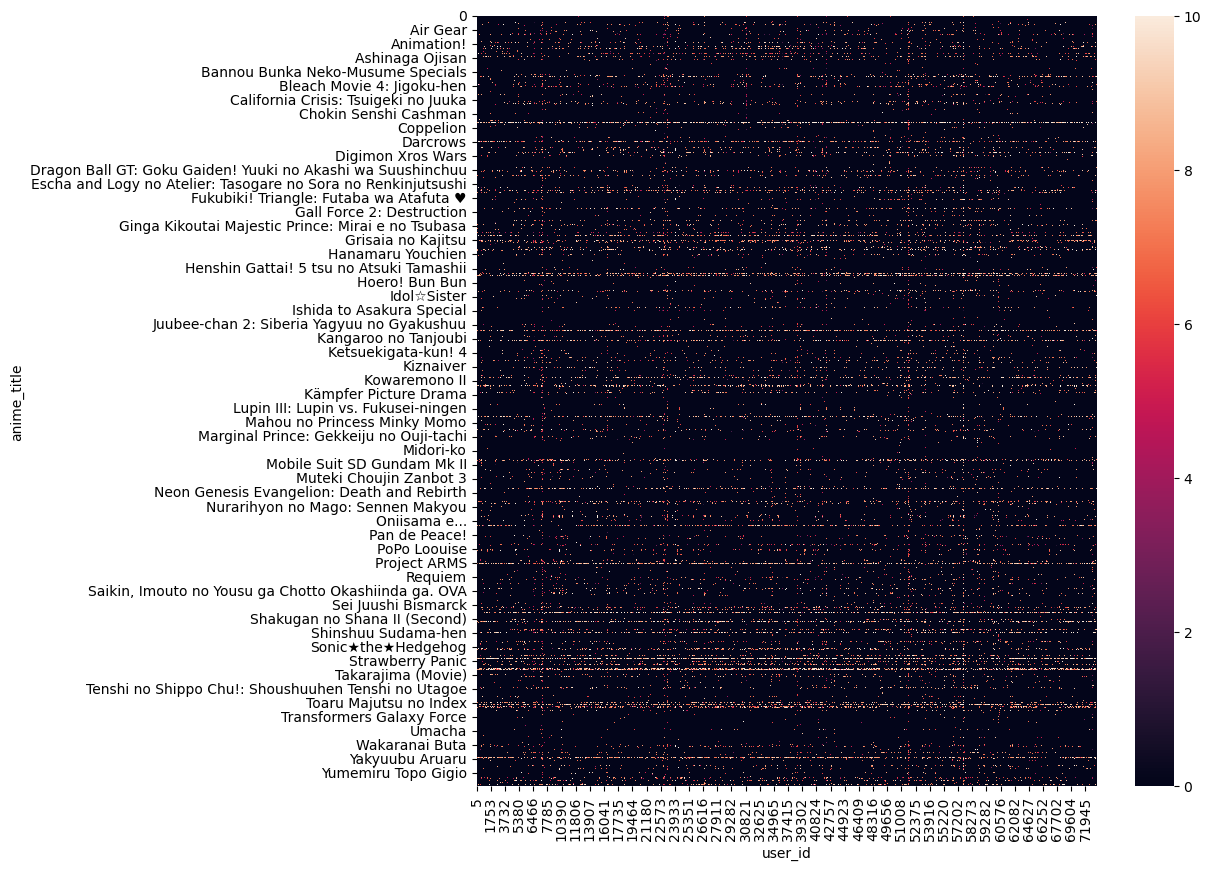

In [175]:
# make a heatmap of the anime_pivot
plt.figure(figsize=(10,10))
sns.heatmap(anime_pivot)

## Collaborative filtering

In [119]:
from scipy.sparse import csr_matrix
#Creating a sparse matrix
anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors

#Fitting the model
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [173]:
def get_rec_cf(title):
    query_index = anime_pivot.index.get_loc(title)
    distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
    res = []
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(anime_pivot.index[indices.flatten()[i]]))
        else:
            print('{0}: {1}'.format(i, anime_pivot.index[indices.flatten()[i]]))
            res.append(anime_pivot.index[indices.flatten()[i]])
    print(res)
    

In [174]:
get_rec_cf('Naruto')

Recommendations for Naruto:

1: Death Note
2: Sword Art Online
3: Code Geass: Hangyaku no Lelouch
4: Fullmetal Alchemist: Brotherhood
5: Bleach
["Death Note", "Sword Art Online", "Code Geass: Hangyaku no Lelouch", "Fullmetal Alchemist: Brotherhood", "Bleach"]


In [151]:
query_index = np.random.choice(anime_pivot.shape[0])
# query_index = anime_pivot.index.get_loc('Naruto')
#print(query_index)
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [152]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Danball Senki Wars:

1: Danball Senki W, with distance of 0.47396181474301335:
2: Danball Senki, with distance of 0.47668990217756435:
3: Battle Spirits: Heroes, with distance of 0.6192162253269352:
4: Battle Spirits: Brave, with distance of 0.6349166302657261:
5: Battle Spirits: Sword Eyes Gekitouden, with distance of 0.6416420382820245:


## Content based filtering

In [43]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

#getting tfidf
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
anime_data['genre'] = anime_data['genre'].fillna('')
genres_str = anime_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

In [45]:
genres_str.head()

0    ['Drama', ' Romance', ' School', ' Supernatural']
1    ['Action', ' Adventure', ' Drama', ' Fantasy',...
2    ['Action', ' Comedy', ' Historical', ' Parody'...
3                              ['Sci-Fi', ' Thriller']
4    ['Action', ' Comedy', ' Historical', ' Parody'...
Name: genre, dtype: object

In [46]:
# convert tfv_matrix table to pd dataframe and print it out
tfv_matrix_df = pd.DataFrame(tfv_matrix.toarray(), columns=tfv.get_feature_names())
tfv_matrix_df.head()

,action,action adventure,action adventure cars,action adventure comedy,action adventure demons,action adventure drama,action adventure ecchi,action adventure fantasy,action adventure game,action adventure historical,...,super,super power,super power supernatural,supernatural,supernatural thriller,supernatural vampire,thriller,vampire,yaoi,yuri
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.234445,0.0,0.0,0.00000,0.0,0.0,0.0
1,0.107026,0.157435,0.0,0.0,0.0,0.257576,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
2,0.098475,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.44336,0.0,0.0,0.0
4,0.098475,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0


In [47]:

from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

#getting the indices of anime title
indices = pd.Series(anime_data.index, index=anime_data['name']).drop_duplicates()

In [48]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the animes 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar animes
    sig_scores = sig_scores[1:11]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]

    # Top 10 most similar animes
    return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values})


In [50]:
give_rec('Code Geass: Hangyaku no Lelouch')

,Anime name,Rating
0,Code Geass: Hangyaku no Lelouch Special Editio...,7.78
1,Code Geass: Hangyaku no Lelouch Recaps,7.12
2,Seishoujo Kantai Virgin Fleet,5.53
3,Double Circle,5.08
4,Sacred Seven: Shirogane no Tsubasa,6.85
5,Sacred Seven,6.74
6,Yuusha-Ou GaoGaiGar Final Grand Glorious Gathe...,7.75
7,Kiddy Grade: Truth Dawn,7.34
8,Kiddy Grade: Maelstrom,7.33
9,Kiddy Grade: Ignition,7.21
